In [1]:
#Using the past 60 days stock price
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import pandas_datareader as web 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')


2024-06-20 13:29:10.131793: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-20 13:29:10.131911: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-20 13:29:10.298206: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Load the data from the CSV file
df = pd.read_csv('/kaggle/input/appl-data-2/AAPL-2.csv')

# Display the data
print(df)

            Date        Open        High         Low       Close   Adj Close  \
0     2012-01-03   14.621429   14.732143   14.607143   14.686786   12.433826   
1     2012-01-04   14.642857   14.810000   14.617143   14.765714   12.500645   
2     2012-01-05   14.819643   14.948214   14.738214   14.929643   12.639425   
3     2012-01-06   14.991786   15.098214   14.972143   15.085714   12.771559   
4     2012-01-09   15.196429   15.276786   15.048214   15.061786   12.751297   
...          ...         ...         ...         ...         ...         ...   
3061  2024-03-05  170.759995  172.039993  169.619995  170.119995  170.119995   
3062  2024-03-06  171.059998  171.240005  168.679993  169.119995  169.119995   
3063  2024-03-07  169.149994  170.729996  168.490005  169.000000  169.000000   
3064  2024-03-08  169.000000  173.699997  168.940002  170.729996  170.729996   
3065  2024-03-11  172.940002  174.380005  172.050003  172.750000  172.750000   

         Volume  
0     302220800  
1  

In [3]:
#get rows and columns
df.shape

(3066, 7)

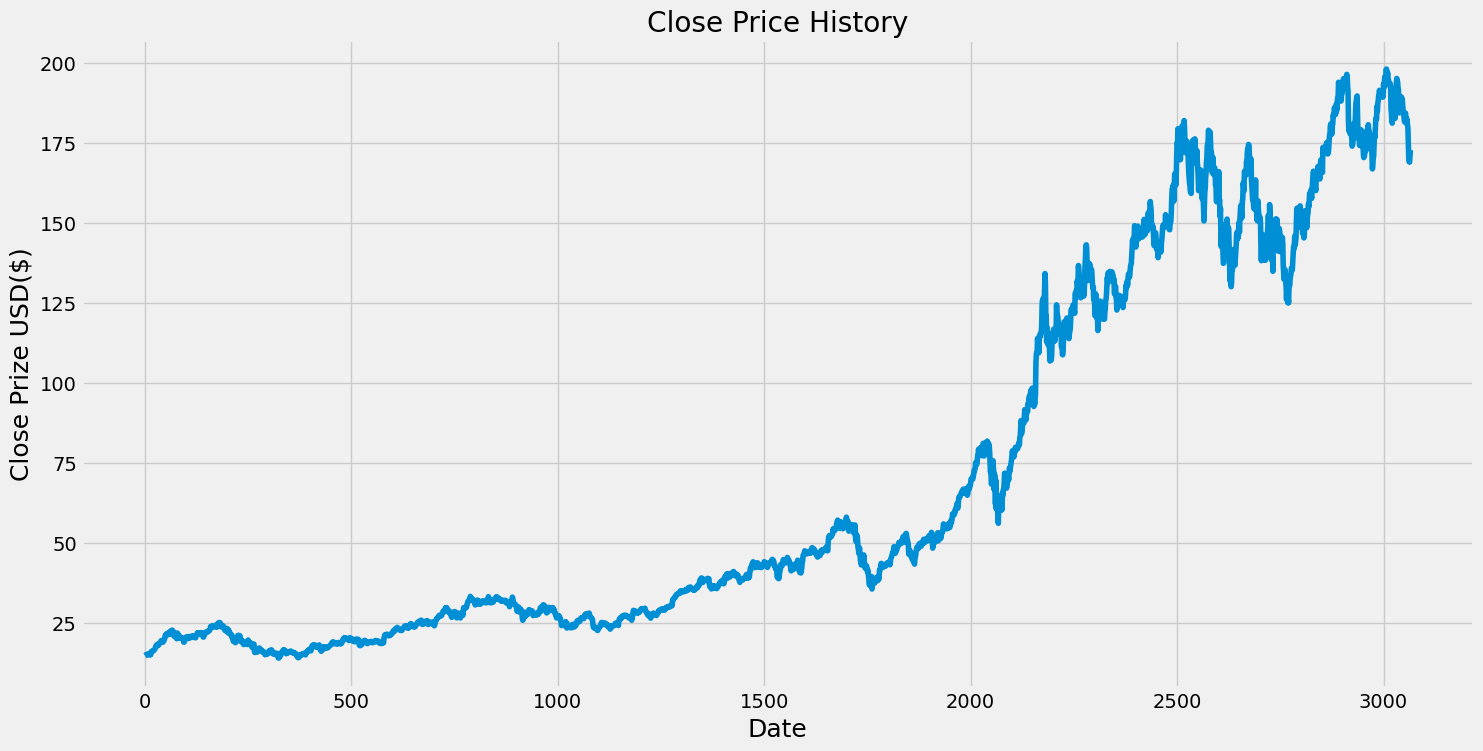

In [4]:
#visualize yhe closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Prize USD($)', fontsize = 18)
plt.show()

In [5]:
#create  new dataframe with only the 'Close column'
data = df.filter(['Close'])
#convert the dataset to a numpy array
dataset = data.values
#get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)* .8)
training_data_len

2453

In [6]:
#scale the data
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00401431],
       [0.00444289],
       [0.00533302],
       ...,
       [0.84193307],
       [0.85132693],
       [0.86229552]])

In [7]:
#Create the training data set
#Create the scaked trining data set
train_data = scaled_data[0:training_data_len, :]

#Split the data into x_train and y_train data set
x_train = [] #independent training variables
y_train = [] #dependent training variables

for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60:i, 0]) #will contain 60 values from index 0 to 59
    y_train.append(train_data[i, 0]) #will contain 61st value on index 60
    
    if i<=61:
        print(x_train)
        print(y_train)
        print()


[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.00721801, 0.00577324, 0.00715207, 0.00579457,
       0.01088519, 0.01049151, 0.01100542, 0.01211663, 0.01278955,
       0.01273332, 0.01252582, 0.01341013, 0.01424207, 0.01518457,
       0.01670691, 0.01990478, 0.01995326, 0.02173353, 0.02306387,
       0.02077747, 0.02165789, 0.02164044, 0.02410915, 0.02375813,
       0.02440779, 0.02557523, 0.0262249 , 0.02809631, 0.02945961,
       0.02985329, 0.02999099, 0.02765997, 0.02709757, 0.02718097,
       0.02937236, 0.02998905, 0.03131358, 0.03443582, 0.03860139,
       0.0378218 , 0.03782374, 0.04083544, 0.04177794, 0.04110694,
       0.04049413, 0.03985611, 0.04197573, 0.0434302 , 0.04403914])]
[0.04253425077019343]

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.00721801, 0.00

In [8]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
#Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2393, 60, 1)

In [10]:
#Built the LSTM model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape =( x_train.shape[1], 1)))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(50))
model.add(Dense(1))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
#Compile the model
model.compile(optimizer='adam', loss ='mean_squared_error') 
#the optimizer is used to improve upon the loss funtcion
# the loss function is used to measure how well the model did on training

In [12]:
#Train the model
model.fit(x_train, y_train, batch_size = 1, epochs = 1)
# epoch the number of entire iterations 


2393/2393 ━━━━━━━━━━━━━━━━━━━━ 79s 32ms/step - loss: 0.0015


In [13]:
#Create the testing data set
#Create a new array containing scaled values from index 140 to 200
test_data = scaled_data[training_data_len - 60: , :]

#Create the data sets x_test and y_test
x_test =[]
y_test = dataset[training_data_len:, :] 
#y_test are all of the values that we want our model to predict

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [14]:
#Convert the data into numpy array
x_test = np.array(x_test)

In [15]:
#Rehsape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [16]:
#Get the models predicted the price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) #unsclaing the values

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


In [17]:
#Getting the root mean squared error (RMSE) 
#(the standard deviation of the residuals)
#the lower value of RMSE indicate a better fit (0 means that the predictions are perfect)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse 

2.0870191102878395

<function matplotlib.pyplot.show(close=None, block=None)>

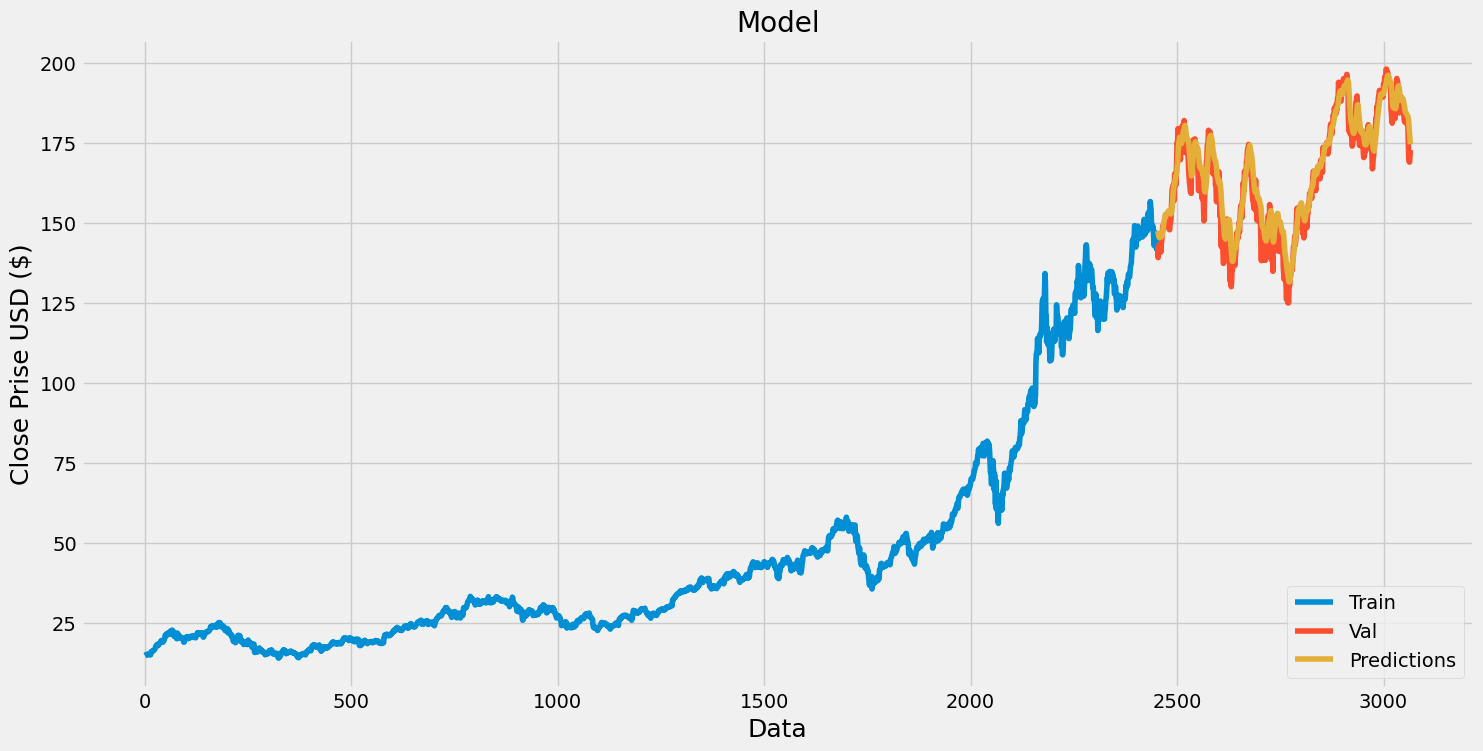

In [18]:
#Plot the data
train = data[:training_data_len].copy()
valid = data[training_data_len:].copy()
valid['Predictions'] = predictions[:len(valid)]

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data', fontsize = 18)
plt.ylabel('Close Prise USD ($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show

In [19]:
#Show the valid and predicted prices
valid

,Close,Predictions
2453,142.649994,147.503738
2454,139.139999,147.018066
2455,141.110001,146.174194
2456,142.000000,145.619858
2457,143.289993,145.395721
...,...,...
3061,170.119995,181.631821
3062,169.119995,179.715668
3063,169.000000,177.643127
3064,170.729996,175.809891


In [20]:
#Get the quote
selected_data = pd.read_csv('/kaggle/input/appl-data-2/AAPL-2.csv')

# Set the start and end dates
start_date = '2012-01-01'
end_date = '2024-03-01'

# Filter the data for the specified period
apple_quote = selected_data[(selected_data['Date'] >= start_date) & (selected_data['Date'] <= end_date)]

#Create a new dataframe
new_df = apple_quote.filter(['Close'])

#Get the last 60 days closing price and convert the dataframe to an array
last_60_days = new_df[-60:].values

#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)

#Convert the X_test data set to a numpy array
X_test = np.array(X_test)

#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Get the predicted scaled price
pred_price = model.predict(X_test)

#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[182.74945]]


In [21]:
selected_data = pd.read_csv('/kaggle/input/appl-data-2/AAPL-2.csv')

# Set the start and end dates
start_date = '2024-03-01'
end_date = '2024-03-01'

# Filter the data for the specified period
filtered_data = selected_data[(selected_data['Date'] >= start_date) & (selected_data['Date'] <= end_date)]

# Display the 'Close' prices for this period
print(filtered_data['Close'])


3059    179.660004
Name: Close, dtype: float64
